## 1.CSV (Comma-Separated Values)

공공데이터포털에서 "전국어린이보호구역표준데이터" CSV 파일을 다운로드함  
(Github의 data.zip을 압축해제하면 들어있음)   
https://www.data.go.kr/data/15012891/standard.do

In [1]:
import pandas as pd

In [5]:
# "전국어린이보호구역표준데이터" CSV 파일 로딩 
# df_schoolzone = pd.read_csv('./data/전국어린이보호구역표준데이터.csv')

df_schoolzone = pd.read_csv('./data/전국어린이보호구역표준데이터.csv', header=0, 
                          names=['type', 'name', 'addr_road', 'addr_jibun', 'lat', 'lon', 'admin_nm', 'admi_police', 'cctv_yn', 'cctv_cnt', 'road_width', 'date_data', 'admin_cd', 'admin_nm2'], 
                          usecols=['type', 'name', 'addr_road', 'addr_jibun', 'lat', 'lon', 'admin_nm', 'cctv_yn', 'cctv_cnt'],
                          dtype={'type':object, 'name':object, 'addr_road':object, 'addr_jibun':object, 'lat':float, 'lon':float, 'admin_nm':object, 'cctv_yn':object, 'cctv_cnt':object }, 
                 encoding="EUC-KR", 
                 delimiter=',' , #항목 구분자 '\t'
                 thousands = ',', #천단위 쉼표 제거   
                 index_col=None) 

- 잘 정리된 CSV는 파라미터를 상세하게 정의하지 않고 경로와 파일명만 지정해줘도 읽을 수 있음  
 : 어린이보호구역표준데이터 등 많은 표준데이터가 한글 항목명을 가지고 있음. 영문 항목명으로 지정해주는 것을 권장함   
 : 여러 이유로 오류가 나는 경우 맨 아래의 에러 원인을 보고, 필요시 구글링해보면 대부분 해결할 수 있음  
- header : CSV에 헤더가 포함되어 있으면 0, 없으면 None 
- names : 한글 항목명인 경우, 영문 항목명 등 원하는 항목명으로 대체할 수 있는 파라미터  
- usecols : 실제로 사용할 항목만 가져올 수 있음. 대량 데이터 특히, 항목이 많은 데이터인 경우 유용함  
- dtype : 각 항목의 데이터 타입을 미리 지정하면 나중에 형 변환으로 인한 수고를 덜 수 있음. 자동으로 인식하나 완벽하지 않음  
- encoding : 인코딩 관련 오류가 나는 경우 EUC-KR, UTF-8, CP949 중 한가지씩 적용해보면 됨  
- delimiter : CSV 파일의 구분자 기호를 지정할 수 있음. 탭으로 구분된 경우에는 '\t'을 적용하면 됨  
- thousands : 숫자, 금액에 천단위 구분자로 쉼표가 들어있는 경우 제거하고 로딩해주는 파라미터  
- index_col : 인덱싱 항목을 지정해주는 파라미터. 어린이보호구역표준데이터에는 인덱스 번호가 없으므로 None으로 지정함   

In [6]:
df_schoolzone.info() #데이터프레임 기본 정보 - 행수, 컬럼 정보 등

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17472 entries, 0 to 17471
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   type        17472 non-null  object 
 1   name        17472 non-null  object 
 2   addr_road   17421 non-null  object 
 3   addr_jibun  13815 non-null  object 
 4   lat         17468 non-null  float64
 5   lon         17468 non-null  float64
 6   admin_nm    17472 non-null  object 
 7   cctv_yn     17472 non-null  object 
 8   cctv_cnt    12766 non-null  object 
dtypes: float64(2), object(7)
memory usage: 1.2+ MB


In [9]:
df_schoolzone #맨 위의 5행 정보를 보여줌. 괄호안에 건수 지정 가능. 맨 아래 5건은 .tail()

,type,name,addr_road,addr_jibun,lat,lon,admin_nm,cctv_yn,cctv_cnt
0,어린이집,베스트어린이집,경기도 오산시 외삼미로 152번길 2(외삼미동),경기도 오산시 외삼미동 158-4,37.197877,127.061423,경기도 오산시,Y,1
1,초등학교,낭성초등학교,충청북도 청주시 상당구 낭성면 낭성시내길 5,충청북도 청주시 상당구 낭성면 이목리 108-1,36.623674,127.601792,청주시,Y,3
2,초등학교,솔밭초교,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.641637,127.426091,청주시,Y,2
3,유치원,솔밭초교 병설유치원,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.641637,127.426091,청주시,Y,NaN
4,초등학교,운동초교,충청북도 청주시 상당구 목련로117번길 109,충청북도 청주시 상당구 용암동 2948,36.606536,127.512967,청주시,Y,7
...,...,...,...,...,...,...,...,...,...
17467,유치원,고은유치원,경기도 용인시 처인구 포곡읍 석성로1069번길 8,경기도 용인시 처인구 포곡읍 영문리 31-5,37.275912,127.213753,경기도 용인시,Y,1
17468,유치원,해오름유치원,경기도 용인시 처인구 낙은로97번길 19(역북동),경기도 용인시 처인구 역북동 310-4,37.241994,127.192294,경기도 용인시,Y,1
17469,어린이집,기흥삼성어린이집,경기도 용인시 기흥구 농서로 162(농서동),경기도 용인시 기흥구 농서동 158,37.225215,127.081169,경기도 용인시,Y,1
17470,어린이집,딸기어린이집,경기도 용인시 기흥구 한보라2로 85-5(보라동),경기도 용인시 기흥구 보라동 222-2,37.249619,127.112570,경기도 용인시,Y,1


## 2.Excel  

공공데이터포털에서 "전국어린이보호구역표준데이터" xls 파일을 다운로드함    
(역시 압축파일에 포함되어 있음)  
https://www.data.go.kr/data/15012891/standard.do

In [11]:
# 엑셀(xls, xlsx)
df_schoolzone2 = pd.read_excel('./data/전국어린이보호구역표준데이터-20210105.xls', 
                               sheet_name = 'Sheet1', header=1 )     

In [12]:
df_schoolzone2.info()
df_schoolzone2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17472 entries, 0 to 17471
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시설종류      17472 non-null  object 
 1   대상시설명     17472 non-null  object 
 2   소재지도로명주소  17421 non-null  object 
 3   소재지지번주소   13815 non-null  object 
 4   위도        17468 non-null  float64
 5   경도        17468 non-null  float64
 6   관리기관명     17472 non-null  object 
 7   관할경찰서명    17472 non-null  object 
 8   CCTV설치여부  17472 non-null  object 
 9   CCTV설치대수  12766 non-null  float64
 10  보호구역도로폭   12133 non-null  object 
 11  데이터기준일자   17472 non-null  object 
 12  제공기관코드    17472 non-null  int64  
 13  제공기관명     17472 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 1.9+ MB


,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자,제공기관코드,제공기관명
0,어린이집,베스트어린이집,경기도 오산시 외삼미로 152번길 2(외삼미동),경기도 오산시 외삼미동 158-4,37.197877,127.061423,경기도 오산시,오산경찰서,Y,1.0,3,2020-09-16,4000000,경기도 오산시
1,초등학교,낭성초등학교,충청북도 청주시 상당구 낭성면 낭성시내길 5,충청북도 청주시 상당구 낭성면 이목리 108-1,36.623674,127.601792,청주시,상당,Y,3.0,4~8,2020-07-17,5710000,충청북도 청주시
2,초등학교,솔밭초교,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.641637,127.426091,청주시,흥덕,Y,2.0,4~8,2020-07-17,5710000,충청북도 청주시
3,유치원,솔밭초교 병설유치원,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.641637,127.426091,청주시,흥덕,Y,NaN,4~8,2020-07-17,5710000,충청북도 청주시
4,초등학교,운동초교,충청북도 청주시 상당구 목련로117번길 109,충청북도 청주시 상당구 용암동 2948,36.606536,127.512967,청주시,상당,Y,7.0,4~8,2020-07-17,5710000,충청북도 청주시


In [13]:
#컬럼명 변경 
df_schoolzone2.rename(columns = {'시설종류' : 'type'}, inplace = True)
df_schoolzone2.rename(columns = {'대상시설명' : 'name'}, inplace = True)
df_schoolzone2.rename(columns = {'소재지도로명주소' : 'addr_road'}, inplace = True)
df_schoolzone2.rename(columns = {'소재지지번주소' : 'addr_jibun'}, inplace = True)
df_schoolzone2.rename(columns = {'위도' : 'lat'}, inplace = True)
df_schoolzone2.rename(columns = {'경도' : 'lon'}, inplace = True)
df_schoolzone2.rename(columns = {'관리기관명' : 'admin_nm'}, inplace = True)
df_schoolzone2.rename(columns = {'관할경찰서명' : 'admi_police'}, inplace = True)
df_schoolzone2.rename(columns = {'CCTV설치여부' : 'cctv_yn'}, inplace = True)
df_schoolzone2.rename(columns = {'CCTV설치대수' : 'cctv_cnt'}, inplace = True)
df_schoolzone2.rename(columns = {'보호구역도로폭' : 'road_width'}, inplace = True)
df_schoolzone2.rename(columns = {'데이터기준일자' : 'date_data'}, inplace = True)
df_schoolzone2.rename(columns = {'제공기관코드' : 'admin_cd'}, inplace = True)
df_schoolzone2.rename(columns = {'제공기관명' : 'admin_nm2'}, inplace = True)

In [14]:
df_schoolzone2.head()

,type,name,addr_road,addr_jibun,lat,lon,admin_nm,admi_police,cctv_yn,cctv_cnt,road_width,date_data,admin_cd,admin_nm2
0,어린이집,베스트어린이집,경기도 오산시 외삼미로 152번길 2(외삼미동),경기도 오산시 외삼미동 158-4,37.197877,127.061423,경기도 오산시,오산경찰서,Y,1.0,3,2020-09-16,4000000,경기도 오산시
1,초등학교,낭성초등학교,충청북도 청주시 상당구 낭성면 낭성시내길 5,충청북도 청주시 상당구 낭성면 이목리 108-1,36.623674,127.601792,청주시,상당,Y,3.0,4~8,2020-07-17,5710000,충청북도 청주시
2,초등학교,솔밭초교,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.641637,127.426091,청주시,흥덕,Y,2.0,4~8,2020-07-17,5710000,충청북도 청주시
3,유치원,솔밭초교 병설유치원,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.641637,127.426091,청주시,흥덕,Y,NaN,4~8,2020-07-17,5710000,충청북도 청주시
4,초등학교,운동초교,충청북도 청주시 상당구 목련로117번길 109,충청북도 청주시 상당구 용암동 2948,36.606536,127.512967,청주시,상당,Y,7.0,4~8,2020-07-17,5710000,충청북도 청주시


## 3.SHP (Shape)


In [10]:
# 공간 데이터 패키지 로딩
import geopandas as gpd

In [11]:
# shp 로딩
gdf_osm_rail = gpd.read_file('./data/gdf_dong.shp', encoding='euc-kr')  #euc-kr, euckr, utf-8, cp949 중 선택
gdf_osm_rail.crs  #좌표계 확인용 

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [95]:
# 차트 시각화 패키지 로딩 
#import matplotlib.pyplot as plt

<AxesSubplot:>

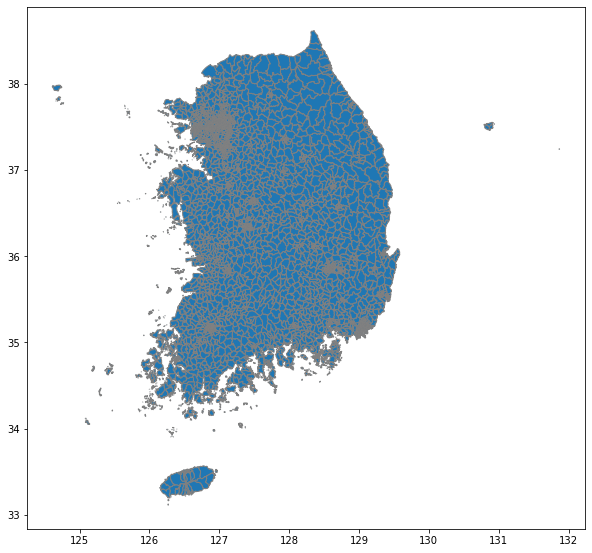

In [13]:
gdf_osm_rail.plot(figsize=(10,10), edgecolor="gray")

## 4.json

02_opendata의 5.OSM에서 편의점만 찾아서 공간시각화 해보기 및 6. 상가업소 정보 조회 및 시각화 복습

## 5.geojson

### 5.1 대한민국 2018년 시도 행정구역

In [14]:
# 대한민국 2018년 시도 행정구역 geojson 로딩
geojson_sido = 'https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2018/json/skorea-provinces-2018-geo.json'

In [15]:
# geojson을 geopandas의 geoDataFrame으로 변환
gdf_sido = gpd.read_file(geojson_sido)
print(gdf_sido.crs, '\n')
gdf_sido.info()
gdf_sido.head()

epsg:4326 

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   name       17 non-null     object  
 1   base_year  17 non-null     object  
 2   name_eng   17 non-null     object  
 3   code       17 non-null     object  
 4   geometry   17 non-null     geometry
dtypes: geometry(1), object(4)
memory usage: 808.0+ bytes


,name,base_year,name_eng,code,geometry
0,서울특별시,2018,Seoul,11,"POLYGON ((127.02215 37.69972, 127.02532 37.699..."
1,부산광역시,2018,Busan,21,"MULTIPOLYGON (((128.82870 35.08997, 128.83203 ..."
2,대구광역시,2018,Daegu,22,"POLYGON ((128.69604 36.01557, 128.69680 36.013..."
3,인천광역시,2018,Incheon,23,"MULTIPOLYGON (((126.48207 37.24419, 126.48263 ..."
4,광주광역시,2018,Gwangju,24,"POLYGON ((126.76338 35.25652, 126.76390 35.254..."


<AxesSubplot:>

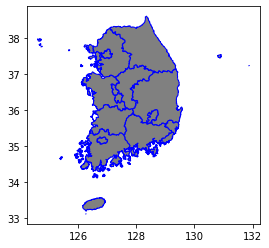

In [16]:
# 시도 경계 지도 보기
gdf_sido.plot(color='gray', edgecolor='blue')

### 5.2 대한민국 비공식 행정동경계 - 2020

In [17]:
#깃허브의 해당 파일 download 버튼 URL 확인 
geojson_sido2 = 'https://github.com/vuski/admdongkor/raw/8e737c267b9006e1e71ca09853c2355d0b452906/ver20201001/HangJeongDong_ver20201001.geojson'

In [18]:
# geojson을 geopandas의 geoDataFrame으로 변환
gdf_sido2 = gpd.read_file(geojson_sido2)
print(gdf_sido2.crs, '\n')
gdf_sido2.info()
gdf_sido2.head()

epsg:4326 

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3492 entries, 0 to 3491
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   OBJECTID  3492 non-null   int64   
 1   adm_nm    3492 non-null   object  
 2   adm_cd    3492 non-null   object  
 3   adm_cd2   3492 non-null   object  
 4   sgg       3492 non-null   object  
 5   sido      3492 non-null   object  
 6   sidonm    3492 non-null   object  
 7   sggnm     3492 non-null   object  
 8   geometry  3492 non-null   geometry
dtypes: geometry(1), int64(1), object(7)
memory usage: 245.7+ KB


,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm,geometry
0,1,서울특별시 종로구 사직동,1101053,1111053000,11110,11,서울특별시,종로구,"MULTIPOLYGON (((126.97689 37.57565, 126.97703 ..."
1,2,서울특별시 종로구 삼청동,1101054,1111054000,11110,11,서울특별시,종로구,"MULTIPOLYGON (((126.98269 37.59507, 126.98337 ..."
2,3,서울특별시 종로구 부암동,1101055,1111055000,11110,11,서울특별시,종로구,"MULTIPOLYGON (((126.97585 37.59656, 126.97359 ..."
3,4,서울특별시 종로구 평창동,1101056,1111056000,11110,11,서울특별시,종로구,"MULTIPOLYGON (((126.97507 37.63139, 126.97649 ..."
4,5,서울특별시 종로구 무악동,1101057,1111057000,11110,11,서울특별시,종로구,"MULTIPOLYGON (((126.96067 37.58080, 126.96281 ..."


<AxesSubplot:>

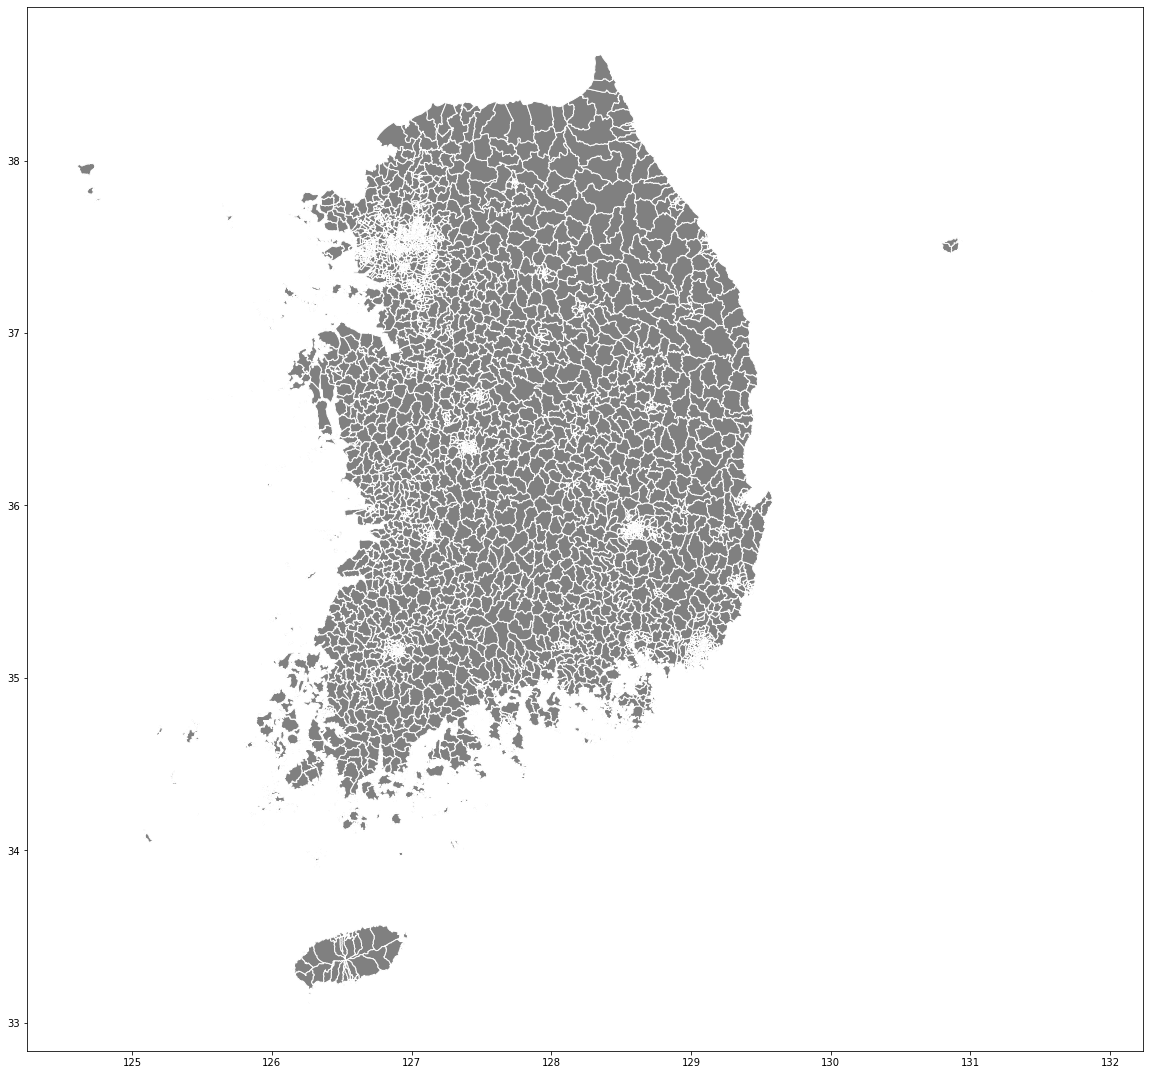

In [19]:
# 행정동경계 지도 보기
gdf_sido2.plot(figsize=(20,20), edgecolor="white", color='gray')
gdf_sido2.plot(figsize=(20,20), edgecolor="white", color='gray')

## 저장

In [128]:
# 엑셀 > 데이터프레임 > CSV 저장
df_schoolzone2.to_csv("./data/df_schoolzone2.csv", encoding='euc-kr')  
#encoding='utf-8-sig' #저장한 파일의 한글이 엑셀에서 깨져 보일 때 

In [126]:
# GeoPandas를 이용하여 공간DataFrmae을 SHP으로 저장
gdf_sido2.to_file('./data/gdf_sido2.shp', encoding='utf-8')

## 정리

local 경로 및 Web 상에 공유된 속성데이터(CSV, Excel, json) 및 공간데이터(geojson, SHP)를 로딩할 수 있음 

## 의문

### 데이터 관련 의문점

- 엑셀이나 대량의 텍스트 데이터를 로딩하는 방법은? (해결)    
- 로딩한 데이터 중에서 잘못된 데이터들을 검토하는 방법은? 
- 가져온 데이터에서 필요한 부분만 추출하는 방법은?  
- 하둡이나 RDB에 있는 데이터를 연동할 수 있는 방법은? 

### 시각화 관련 의문점

- 차트(지도)의 크기를 크게 볼 수는 없을까? (해결)
- 포인트의 크기, 모양, 색상을 바꿀 수 없을까? (일부 해결)
- 차트(지도)에 한글 제목은 적용할 수 없을까?
- 일반적인 웹 지도 서비스처럼 확대/축소/이동 기능을 적용할 수는 없을까? 
- 배경지도를 함께 표시할 수는 없을까?
- 데이터 유형별로 포인트 심볼을 다르게 적용할 수 없을까?
- 경위도로 표시하니 상하-좌우가 1:1이 아니고 위아래가 약간 찌그러져 보이는데 왜 그런지...1:1로 보이게 할 수는 없을지? 
- 중요한 POI에 Labeling을 할 수는 없을까?